<a href="https://colab.research.google.com/github/kssmp/linear_regression/blob/main/supervised_learning_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model
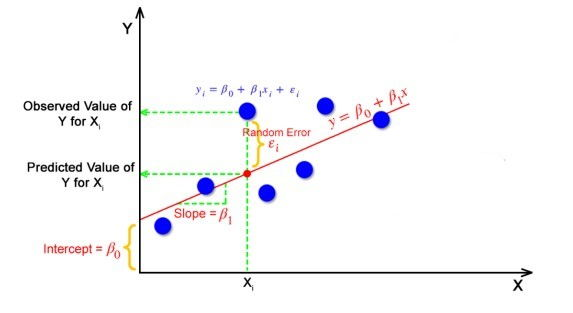

* Ei is our Residual/Errors
* Assumptions are Linearity, Independance, Normality, Homoskedasticity

Evaluating Linear Regression Model

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Eroor (RMSE)
* R^2 Coeff of Determination

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

#Dataset Used
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.


In [ ]:
dataset_cols = ["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]

In [ ]:
df = pd.read_csv("seoulbikedata.csv").drop(["Date","Holiday","Seasons"],axis=1)
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


* The following scatter plots help us extract inferences from the data set as to how the number of bikes rented in Seoul changes with varying conditions
* This also helps us in using the correct Regression models that can be used to make further predictions

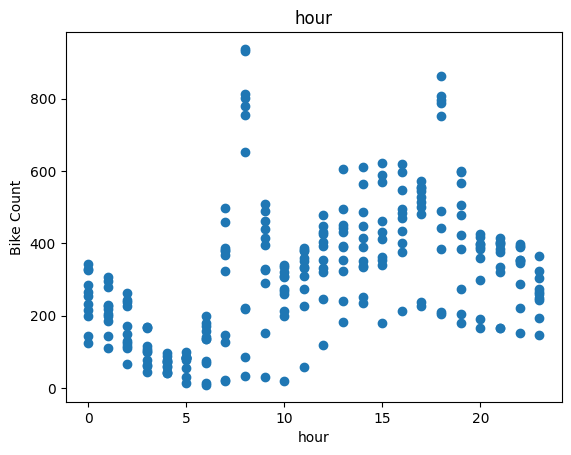

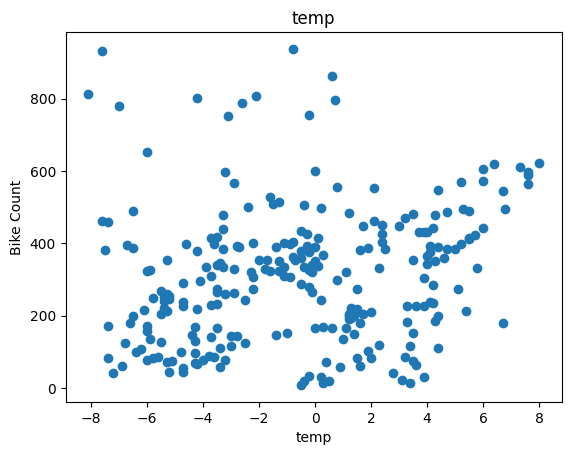

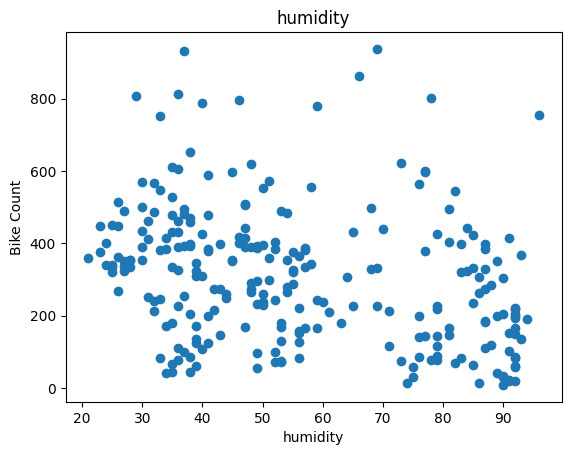

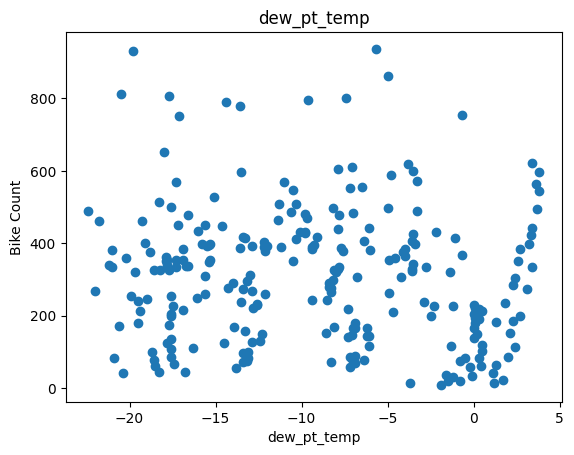

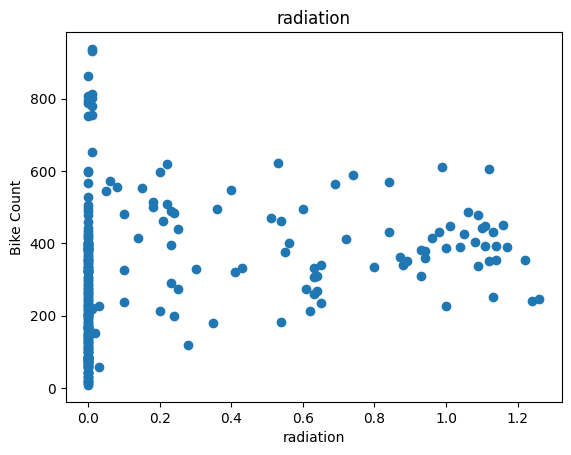

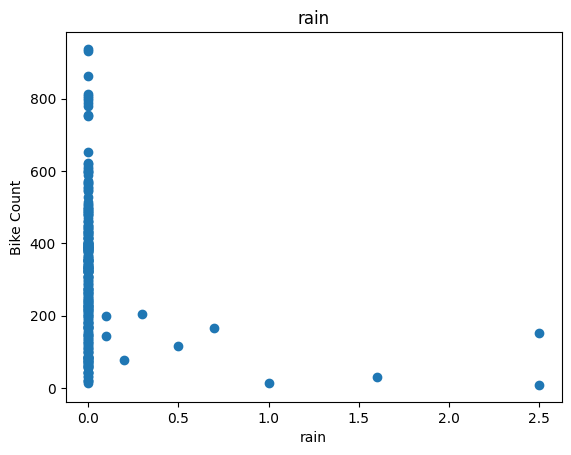

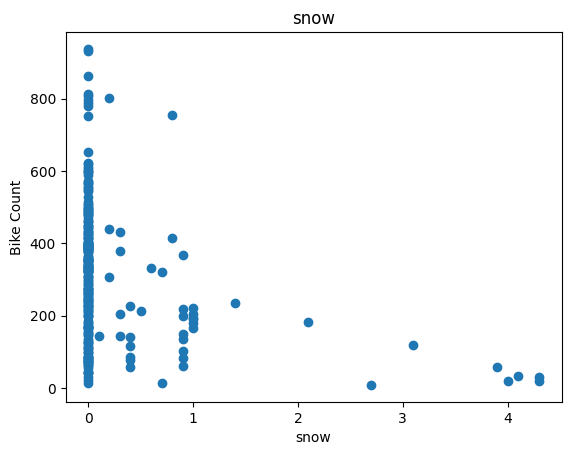

In [ ]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count")
  plt.xlabel(label)
  plt.show()

# Training , Validation & Test Datasets

In [ ]:
train , valid , test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def get_xy (dataframe , y_label , x_label = None):
  dataframe = copy.deepcopy(dataframe)
  if x_label is None:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_label)==1:
      X = dataframe[x_label[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_label].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data,X,y

In [ ]:
_ , X_train_temp , y_train_temp = get_xy(train,"bike_count",x_label=["temp"])
_ , X_val_temp , y_val_temp = get_xy(valid,"bike_count",x_label=["temp"])
_ , X_test_temp , y_test_temp = get_xy(test,"bike_count",x_label=["temp"])

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)
print(temp_reg.coef_, temp_reg.intercept_)
temp_reg.score(X_test_temp,y_test_temp)
# very low score as the initail assumptions for linear regression are not satisfied by the temp graph inputs

[[13.26372855]] [303.70837968]


-0.1715244812671164

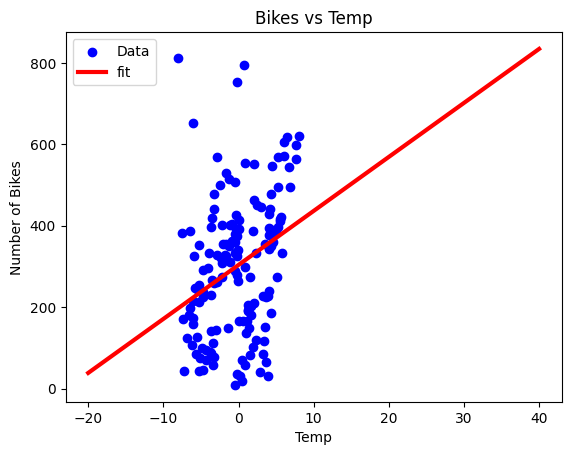

In [ ]:
plt.scatter(X_train_temp , y_train_temp , label = "Data" , color = "blue")
x = tf.linspace(-20 , 40 , 100) # 100 inputs between -20 to 40
plt.plot(x , temp_reg.predict(np.array(x).reshape(-1,1)) , label = "fit" , color = "red" , linewidth = 3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("Number of Bikes")
plt.show()

In [ ]:
_ , X_train_all , y_train_all = get_xy(train,"bike_count",x_label=df.columns[1:])
_ , X_val_all , y_val_all = get_xy(valid,"bike_count",x_label=df.columns[1:])
_ , X_test_all , y_test_all = get_xy(test,"bike_count",x_label=df.columns[1:])

In [ ]:
all_reg = LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [ ]:
all_reg.score(X_test_all,y_test_all)

0.04135505535487927

# Regression using a Linear Neural Net


*   Single dense node means it linear
*   Absense of activation funciton gives a linear output



In [ ]:
#normalizing layer
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'mean_squared_error')

In [ ]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data=(X_val_temp , y_val_temp)
)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

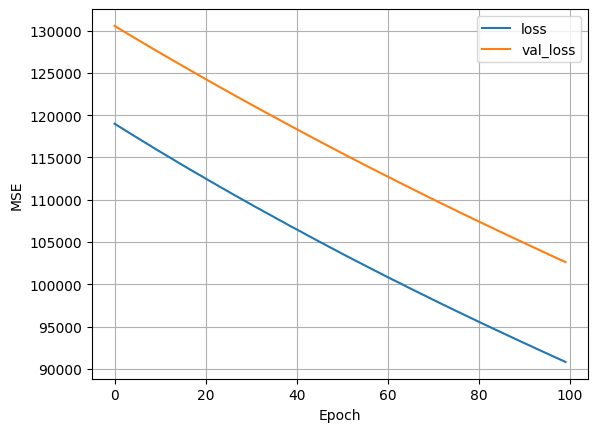

In [ ]:
plot_loss(history)

# Regression using a multi node Neural Net

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1),
])

nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),loss = 'mean_squared_error')

In [ ]:
history = nn_model.fit(
    X_train_temp , y_train_temp,
    validation_data = (X_val_temp , y_val_temp),
    verbose = 0,
    epochs = 100,
)

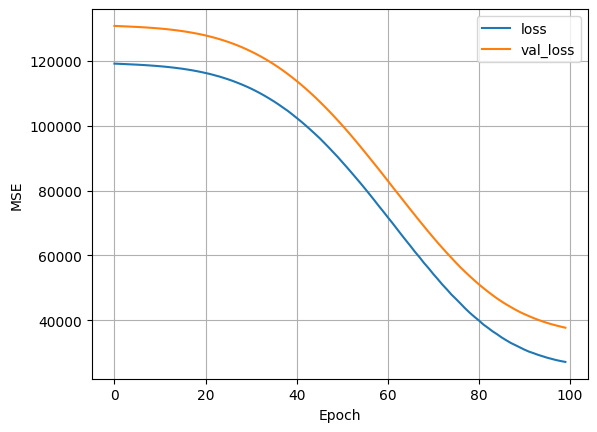

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


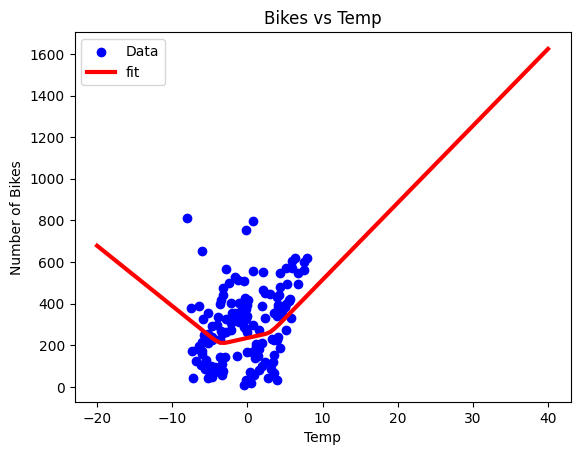

In [ ]:
plt.scatter(X_train_temp , y_train_temp , label = "Data" , color = "blue")
x = tf.linspace(-20 , 40 , 100) # 100 inputs between -20 to 40
plt.plot(x , nn_model.predict(np.array(x).reshape(-1,1)) , label = "fit" , color = "red" , linewidth = 3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("Number of Bikes")
plt.show()

In [ ]:
# for all features

all_normalizer = tf.keras.layers.Normalization(input_shape=(7,), axis=-1)
all_normalizer.adapt(X_train_all)

In [ ]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

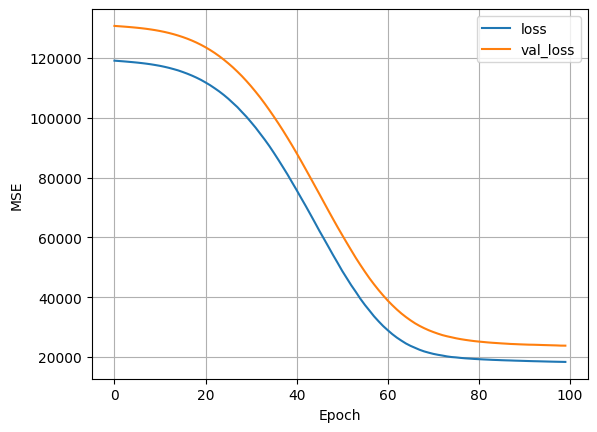

In [ ]:
plot_loss(history)

In [ ]:
# Comparing Mean Squared Error for Liner Regr and Neural Net

y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

2/2 [==============================] - 0s 8ms/step


In [ ]:
def MSE (y_pred , y_real):
  return (np.square(y_pred - y_real)).mean()

In [ ]:
MSE(y_pred_lr , y_test_all)

52790.558824130116

In [ ]:
MSE(y_pred_nn , y_test_all)

56963.548326278906

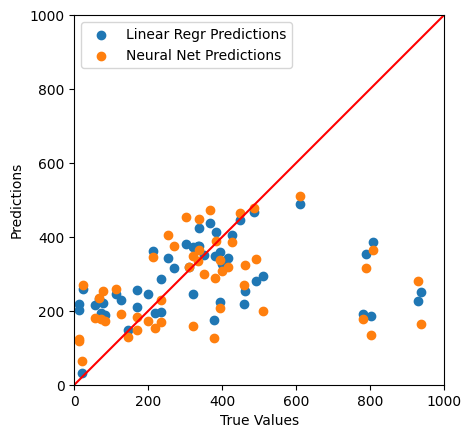

In [ ]:
ax = plt.axes(aspect = "equal")
plt.scatter(y_test_all , y_pred_lr , label = "Linear Regr Predictions")
plt.scatter(y_test_all , y_pred_nn , label = "Neural Net Predictions")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0,1000] #limits
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims , lims , c = "red")
